In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pickle
from mlxtend.regressor import StackingRegressor

In [52]:
pd.read_excel("data/analis_data.xlsx")

,Comuna,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Publi,Precio,UF,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
0,Macul,94,340,4,2,0,0,03/12/2022,266395950,7650,...,0,0,0,0,0,0,0,0,0,0
1,Macul,128,128,2,1,0,1,22/11/2022,110000000,3158,...,0,0,0,0,0,0,0,0,0,0
2,Macul,144,221,4,2,0,3,21/11/2022,262913650,7550,...,0,0,0,0,0,0,0,0,0,0
3,Macul,81,160,3,1,0,3,10/11/2022,125000000,3589,...,0,0,0,0,0,0,0,0,0,0
4,Macul,321,249,7,7,1,2,03/12/2022,350911371,10077,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,Pirque,107,160,5,2,0,1,18/11/2022,123000000,3532,...,0,0,0,0,0,0,0,0,0,0
5294,Pirque,341,5000,3,2,0,0,18/11/2022,574579500,16500,...,0,0,0,0,0,0,0,0,0,0
5295,Pirque,90,140,5,2,0,2,07/11/2022,99000000,2842,...,0,0,0,0,0,0,0,0,0,0
5296,Pirque,75,130,3,1,0,1,07/11/2022,115000000,3302,...,0,0,0,0,0,0,0,0,0,0


In [53]:
casas=pd.read_excel("data/analis_data.xlsx")

# IMPLEMENTACION DE MODELOS DE REGRESION

## Definicion de variables 

In [54]:
casas.columns

Index(['Comuna', 'm2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'segunda_planta', 'Estacionamientos', 'Publi', 'Precio', 'UF', 'UF_log',
       'Poblacion total 2020', 'Superficie de Área Verde m²',
       'Superficie Plazas m²', 'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',
       'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de resid

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

X= casas.drop(['Comuna','Publi','Precio', 'UF', "UF_log"], axis=1)
y= casas["UF"]


seed= 12

#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)



In [56]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)


Total features shape: (5298, 81)
Train features shape: (3973, 81)
Train target shape: (3973,)
Test features shape: (1325, 81)
Test target shape: (1325,)


### 1. Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
print("Score train :", metrics.r2_score(y_train, lr.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, lr.predict(X_test)))
acc1 = metrics.r2_score(y_test, lr.predict(X_test))

Score train : 0.7039722222486362
Score test: 0.7323353804997427


### 2. Decision Trees

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, dt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, dt.predict(X_test)))
acc3 = metrics.r2_score(y_test, dt.predict(X_test))

Score train : 0.7973559197881207
Score test: 0.8059002356054992


### 3. KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, knn.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, knn.predict(X_test)))
acc4 = metrics.r2_score(y_test, knn.predict(X_test))

Score train : 0.8406274326034078
Score test: 0.8248682018843214


Score train : 0.8345632574592086
Score test: 0.8342944284814509

### 4. XGB

In [61]:
#!pip install xgboost

In [62]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=20, random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.9569488037884633
Score test: 0.8753143229786527


In [63]:
X_train.columns

Index(['m2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'segunda_planta', 'Estacionamientos', 'Poblacion total 2020',
       'Superficie de Área Verde m²', 'Superficie Plazas m²',
       'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',
       'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de residuos municipales valorizados',
       ' Porcen

In [64]:
xgb_reg.feature_importances_

array([1.1663967e-02, 5.3367266e-03, 6.7353243e-04, 2.4900527e-03,
       2.5303164e-04, 6.2612194e-04, 1.5675967e-03, 3.6767069e-03,
       1.5031124e-03, 7.8290509e-04, 1.9786083e-03, 1.4014790e-02,
       0.0000000e+00, 5.4173493e-03, 5.2194588e-04, 1.5520145e-03,
       1.4132704e-03, 9.0072484e-04, 1.0595552e-03, 1.9139472e-02,
       7.9997461e-03, 4.7272377e-04, 4.4588046e-03, 5.5791630e-04,
       6.3803424e-03, 8.4388098e-03, 8.2118774e-04, 1.0331043e-03,
       3.6849789e-03, 9.9951867e-04, 1.2328885e-03, 3.0657300e-03,
       8.7714165e-01, 1.2388692e-03, 8.8451005e-04, 8.9743518e-04,
       2.8581042e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.4574162e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0125407e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.4967215e-04, 0.0000000e+00, 0.0000000e

In [65]:
df_impor=pd.DataFrame({"col":X_train.columns, "coef_impor":xgb_reg.feature_importances_})

In [66]:
#pd.set_option("display.max_rows", None)# esto es para ver todas las columnas

In [67]:
#pd.reset_option('all')# esto es para recetear que se vean todas la lineas

In [68]:
df_impor.sort_values(by= "coef_impor", ascending= False).head(10)

,col,coef_impor
32,Porcentaje de viviendas con situación de alleg...,0.877142
19,Consumo Per Capita residencial (Kwh/persona),0.019139
11,Razón entre disponibilidad efectiva de matrícu...,0.014015
0,m2_Construidos,0.011664
25,Porcentaje de participación del FCM en el Ingr...,0.008439
20,Fallos suministro electrico,0.008000
24,Porcentaje de viviendas en mal estado y/o ca...,0.006380
13,Número de establecimientos privados,0.005417
1,m2_totales,0.005337
22,Total de residuos (t),0.004459


In [69]:
xgb_reg.score(X_test, y_test)

0.8753143229786527

In [70]:
xgb_reg.score(X_train, y_train)

0.9569488037884633

### 5. AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=15, random_state=seed)
ada_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, ada_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, ada_reg.predict(X_test)))
acc6 = metrics.r2_score(y_test, ada_reg.predict(X_test))

Score train : 0.8102072279528559
Score test: 0.7890079923252514


### 6. Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=3,  max_features=3, random_state=seed) 
rnd_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, rnd_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, rnd_reg.predict(X_test)))
acc7 = metrics.r2_score(y_test, rnd_reg.predict(X_test))

Score train : 0.6297307251223703
Score test: 0.6645068831587483


### 7. GradientBoosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=110, random_state=seed)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))
acc8 = metrics.r2_score(y_test, gbrt.predict(X_test))




Score train : 0.910861500967502
Score test: 0.8768376051997099


### ENSEMBLE

In [74]:
result = [acc1, acc3, acc4, acc5, acc6, acc7, acc8, ]
models = ['LinReg', "DecTree", "KNN", "XGBoost", "AdaBoost", "RandomForest", "GradBoosting"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

GradBoosting    0.876838
XGBoost         0.875314
KNN             0.824868
DecTree         0.805900
AdaBoost        0.789008
LinReg          0.732335
RandomForest    0.664507
dtype: float64

## VotingRegressor

In [75]:
from sklearn.ensemble import VotingRegressor

estimators = [('LinReg', lr), ("DecTree",dt), ("KNN", knn), ("XGBoost",xgb_reg), ("AdaBoost", ada_reg), ("RandomForest", rnd_reg), ("GradBoosting", gbrt)]

voting_reg = VotingRegressor(estimators=estimators, verbose=True)

voting_reg.fit(X_train, y_train)
print(voting_reg.__class__.__name__, voting_reg.score(X_test,y_test))

[Voting] ................... (1 of 7) Processing LinReg, total=   0.0s
[Voting] .................. (2 of 7) Processing DecTree, total=   0.0s
[Voting] ...................... (3 of 7) Processing KNN, total=   0.0s
[Voting] .................. (4 of 7) Processing XGBoost, total=   0.1s
[Voting] ................. (5 of 7) Processing AdaBoost, total=   0.2s
[Voting] ............. (6 of 7) Processing RandomForest, total=   0.1s
[Voting] ............. (7 of 7) Processing GradBoosting, total=   1.0s
VotingRegressor 0.8685785159105637


___
___
___


## El 2º mejor modelo  XGB

In [76]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=20, random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.9569488037884633
Score test: 0.8753143229786527


In [77]:
predictions = xgb_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 1737.197829820165
MSE: 8816802.948560158
RMSE: 2969.310180590798
MAPE: 0.20341049925438856


### Feature importance del Mejor Modelo XGB

In [78]:
xgb_reg.feature_importances_

array([1.1663967e-02, 5.3367266e-03, 6.7353243e-04, 2.4900527e-03,
       2.5303164e-04, 6.2612194e-04, 1.5675967e-03, 3.6767069e-03,
       1.5031124e-03, 7.8290509e-04, 1.9786083e-03, 1.4014790e-02,
       0.0000000e+00, 5.4173493e-03, 5.2194588e-04, 1.5520145e-03,
       1.4132704e-03, 9.0072484e-04, 1.0595552e-03, 1.9139472e-02,
       7.9997461e-03, 4.7272377e-04, 4.4588046e-03, 5.5791630e-04,
       6.3803424e-03, 8.4388098e-03, 8.2118774e-04, 1.0331043e-03,
       3.6849789e-03, 9.9951867e-04, 1.2328885e-03, 3.0657300e-03,
       8.7714165e-01, 1.2388692e-03, 8.8451005e-04, 8.9743518e-04,
       2.8581042e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.4574162e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0125407e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.4967215e-04, 0.0000000e+00, 0.0000000e

In [79]:
df_impor_xgb=pd.DataFrame({"col":X_train.columns, "coef_impor":xgb_reg.feature_importances_})

In [80]:
df_impor_xgb=df_impor_xgb.round(decimals=2)

In [81]:

df_impor_xgb.sort_values(by= "coef_impor", ascending= False).head(10)

,col,coef_impor
32,Porcentaje de viviendas con situación de alleg...,0.88
19,Consumo Per Capita residencial (Kwh/persona),0.02
0,m2_Construidos,0.01
11,Razón entre disponibilidad efectiva de matrícu...,0.01
20,Fallos suministro electrico,0.01
13,Número de establecimientos privados,0.01
24,Porcentaje de viviendas en mal estado y/o ca...,0.01
25,Porcentaje de participación del FCM en el Ingr...,0.01
1,m2_totales,0.01
52,Lampa,0.00


##  El Mejor Modelo GradientBoosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=110, random_state=seed, max_depth=3)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))
acc8 = metrics.r2_score(y_test, gbrt.predict(X_test))




Score train : 0.910861500967502
Score test: 0.8768376051997099


In [83]:
# predictions 

In [84]:
predictions = gbrt.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 1771.424586806195
MSE: 8709088.257515037
RMSE: 2951.116442554417
MAPE: 0.21401478684844888


In [85]:
# Los mismos datos pero aplicando np.expm1

In [86]:
predictions = gbrt.predict(X_test)


print('MAE:', metrics.mean_absolute_error((y_test),(predictions)))  
print('MSE:', metrics.mean_squared_error((y_test),(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error((y_test),(predictions))))
print('MAPE:', metrics.mean_absolute_percentage_error((y_test),(predictions)))

MAE: 1771.424586806195
MSE: 8709088.257515037
RMSE: 2951.116442554417
MAPE: 0.21401478684844888


### Feature importance

In [87]:
gbrt.feature_importances_

array([2.96798151e-01, 2.62004511e-01, 1.87584689e-03, 5.23953589e-02,
       8.71476338e-04, 2.39276347e-03, 8.97521478e-05, 9.11637503e-04,
       5.26895462e-04, 3.99415817e-04, 2.25956683e-03, 3.52424528e-02,
       0.00000000e+00, 2.58426110e-02, 2.52070323e-03, 6.02634641e-05,
       0.00000000e+00, 1.57032613e-04, 9.89576180e-05, 5.72116928e-02,
       1.69005869e-02, 5.90564117e-04, 0.00000000e+00, 1.17726648e-03,
       2.59409440e-03, 4.78865950e-02, 1.30592398e-03, 4.88792864e-05,
       6.63814552e-04, 2.83215222e-04, 1.08647508e-03, 9.80544180e-04,
       1.75421607e-01, 1.70757095e-03, 2.08507765e-03, 3.33930174e-04,
       2.43513696e-03, 6.45661934e-06, 0.00000000e+00, 0.00000000e+00,
       5.57046760e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.92785237e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.05446313e-03,
       0.00000000e+00, 1.01519704e-04, 2.70986268e-04, 0.00000000e+00,
      

In [88]:
df_impor_gbrt=pd.DataFrame({"col":X_train.columns, "coef_impor":gbrt.feature_importances_})

In [89]:
#surveys_df['sex'].dtype
df_impor_gbrt["coef_impor"].dtype

dtype('float64')

In [90]:
df_impor_gbrt=df_impor_gbrt.round(decimals=2)

In [91]:

df_impor_gbrt.sort_values(by= "coef_impor", ascending= False).head(10)

,col,coef_impor
0,m2_Construidos,0.30
1,m2_totales,0.26
32,Porcentaje de viviendas con situación de alleg...,0.18
19,Consumo Per Capita residencial (Kwh/persona),0.06
3,Banos,0.05
25,Porcentaje de participación del FCM en el Ingr...,0.05
11,Razón entre disponibilidad efectiva de matrícu...,0.04
13,Número de establecimientos privados,0.03
20,Fallos suministro electrico,0.02
60,Padre Hurtado,0.00


___
___
___


## PCA

In [72]:
from sklearn.decomposition import PCA

In [73]:
model_pca = PCA(n_components=81)
model_pca.fit(X_train)
X_pca = model_pca.fit_transform(X_train)

In [74]:
X_pca.shape  

(3981, 81)

In [75]:
ratio = model_pca.explained_variance_ratio_
ratio.round(3)

array([0.894, 0.1  , 0.006, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [76]:
ratiot = model_pca.explained_variance_ratio_.cumsum()
ratiot.round(5)

array([0.89362, 0.99384, 0.99975, 0.99999, 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     ])

In [57]:
ratiot[:4]

array([0.89362101, 0.99384427, 0.99974962, 0.99999299])

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

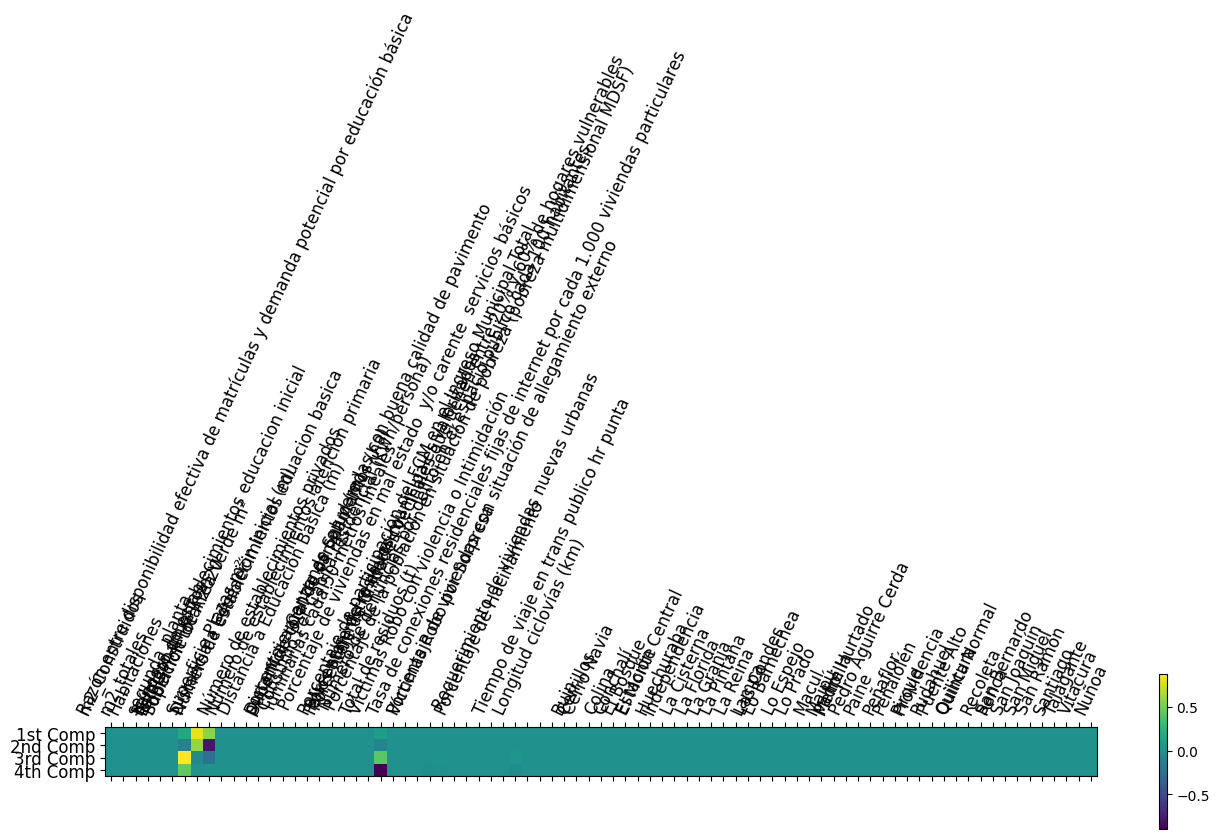

In [59]:
#plt.figure(figsize=(20,20))
plt.matshow(model_pca.components_[0:4], cmap='viridis')
plt.yticks([0,1,2,3,],['1st Comp','2nd Comp','3rd Comp','4th Comp',], fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

In [60]:
pd.DataFrame(data=model_pca.components_[0:4], columns=X.columns, index=['PC1','PC2','PC3','PC4'])

,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
PC1,-0.000054,-0.000137,-1.216009e-07,-6.174561e-08,1.023890e-08,-8.071056e-08,0.157593,0.806616,0.562040,0.000055,...,1.076014e-08,-7.309180e-09,-2.958245e-09,-1.098805e-08,-2.360895e-08,-1.511877e-09,8.945339e-09,-1.085295e-08,-4.657105e-09,-2.831419e-08
PC2,0.000034,0.000145,9.782375e-07,8.743890e-07,-3.533640e-08,2.294650e-07,-0.125236,0.587836,-0.795087,-0.000095,...,1.341574e-07,-6.827765e-09,-8.744593e-08,-9.398720e-09,-2.317371e-08,-2.092777e-09,2.870160e-07,-1.592082e-08,1.546031e-07,-3.586365e-08
PC3,-0.000373,-0.002152,-2.518556e-07,-3.617517e-06,1.666029e-07,-2.313677e-06,0.874321,-0.061783,-0.226644,0.000219,...,-1.484611e-07,2.412528e-08,2.236742e-07,6.587236e-09,1.551166e-07,-2.761511e-09,1.869609e-06,-7.362854e-08,-3.940616e-07,4.359521e-07
PC4,-0.000060,0.001172,4.050409e-06,1.104207e-05,-5.097251e-07,7.217732e-06,0.441470,0.001177,0.022880,-0.000654,...,-1.584558e-07,-1.282616e-07,-2.537110e-07,-4.518744e-07,-2.284216e-07,-3.056533e-08,-1.990341e-06,-1.348107e-07,-2.914632e-07,1.566299e-06


___
___
___

# Vamos aplicar un Pipeline y GridSearchCV al segundo mejor modelo XGB

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [115]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
    
])


xgboost_params = {
    'regressor': [XGBRegressor()],
    'regressor__max_depth': [3,4,5,6],
    'regressor__n_estimators': [120, 140, 160, 180, 200]

}


search_space = [
  
    xgboost_params,
]

clf_xgb = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamm...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=3,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=160,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__max_depth': [3, 4, 5, 6],
                          'regressor__n_estimators': [120, 140, 160, 180,
                                                      200]}])

In [116]:
from sklearn import metrics
print(clf_xgb.best_estimator_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=3, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=160,
                              n_jobs=0, num_parallel_tree=1,

In [119]:
print(clf_xgb.best_params_)

{'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=160, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...), 'regressor__max_depth': 3, 'regressor__n_estimators': 160}


In [120]:
print(clf_xgb.best_score_) # 0,76

0.885496037410082


In [121]:
clf_xgb.score(X_train, y_train)

0.935045331896379

In [64]:
#import joblib

In [65]:
#joblib.dump(clf_b, 'modelo_entrenado.pkl') # Guardo el modelo.

['modelo_entrenado.pkl']

In [66]:
#clf_b = joblib.load('modelo_entrenado.pkl')# cargar el modelo 

In [68]:
#Score train : 0.9567069101263656
#Score test: 0.8791607391254542

 ## GridSearchCV sin pipeline XGB

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


XGB =XGBRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [120,140,160,180,200],
                  'max_depth'    : [4,5,6,8]# profundidad
                 }

In [124]:
grid_XGB = GridSearchCV(estimator= XGB,  # estuviemos copando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 5, 6, 8],
                         'n_estimators': [120, 140, 160, 180, 200],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [92]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=180, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.8895067326678868

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 180, 'subsample': 0.9}


## Pipeline solo

In [93]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=7)), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9233092471055158
GBR_test: 0.7900832314439521


In [ ]:
#Score train : 0.9567069101263656
#Score test: 0.8791607391254542

___
___


# Vamos aplicar un Pipeline y GridSearchCV Bosting_regressor

In [ ]:
#https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [125]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])


bosting_ressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3,4,5,6,8],
    'regressor__n_estimators': [100,120,140,160,180,200]
    
}


search_space = [
  
    bosting_ressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=5,
                                                                  n_estimators=120)],
                          'regressor__max_depth': [3, 4, 5, 6, 8],
                          'regressor__n_estimators': [100, 120, 140, 160, 180,
                                                      200]}])

In [126]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

##como  saber el  resultado del score test despues de aplicar pipeline y el gridsearchCV



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=5, n_estimators=120))])
0.8907728599041604
{'regressor': GradientBoostingRegressor(max_depth=5, n_estimators=120), 'regressor__max_depth': 5, 'regressor__n_estimators': 120}


In [ ]:
# Score train : 0.9100212738036423
# Score test: 0.875770251186037

___
___


 # GridSearchCV sin pipeline

In [ ]:
#https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [100, 160, 200, 300],
                  'max_depth'    : [3,4,5,6,8]# profundidad
                 }

In [132]:
grid_GBR = GridSearchCV(estimator=GBR,  # estuvimos copiando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 5,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [100, 160, 200, 300],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [133]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=5, n_estimators=200,
                          subsample=0.9)

 The best score across ALL searched params:
 0.8919254632121338

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}


In [ ]:
# Score train : 0.9100212738036423
# Score test: 0.875770251186037

___
___


# Pipeline Solo 

In [134]:
pipeline = Pipeline([('scaler',StandardScaler()), ('regressor', GradientBoostingRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9083854018423732
GBR_test: 0.8932340601171507


In [ ]:
# Score train : 0.9100212738036423
# Score test: 0.875770251186037

___
___


# Vamos aplicar un Pipeline y GridSearchCV a ambos modelos 

In [ ]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])

xgboost_params = {
    'regressor': [XGBRegressor()],
    'regressor__max_depth': [3],
    'regressor__n_estimators': [100]
}


bosting_regressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3],
    'regressor__n_estimators': [100]
}




search_space = [
    xgboost_params,
    bosting_regressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamm...
                                                     max_delta_step=None,
                                                     max_depth=3,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__max_depth': [3],
                          'regressor__n_estimators': [100]},
                         {'regressor': [GradientBoostingRegressor()],
                          'regressor__max_depth': [3],
                          'regressor__n_estimators': [100]}])

In [ ]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=3, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1,

In [ ]:



#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
#https://www.kaggle.com/code/edoardo10/house-price-top-14-stacking-regressor

___
___
___

In [138]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=50)),('regressor', GradientBoostingRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.8533205458692078
GBR_test: 0.8020998158829963


In [136]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=50)),('regressor',XGBRegressor ())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9694376238739717
GBR_test: 0.8155865369325896


## StackingRegressor número 2

In [ ]:
from mlxtend.regressor import StackingRegressor

In [139]:
lr = LinearRegression()
dt= DecisionTreeRegressor(max_depth=4)
knn = KNeighborsRegressor(n_neighbors=15)
xgb_reg = XGBRegressor(n_estimators=160, random_state=seed,max_depth=3)
ada_reg = AdaBoostRegressor(n_estimators=15, random_state=seed)
rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=3,  max_features=3, random_state=seed) 
gbrt = GradientBoostingRegressor(n_estimators=200, random_state=seed,max_depth=5)

In [140]:
stregr = StackingRegressor(regressors=[dt, gbrt, xgb_reg, ada_reg, rnd_reg, knn], 
                           meta_regressor= lr)

stregr.fit(X_train, y_train)


StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[DecisionTreeRegressor(max_depth=4),
                              GradientBoostingRegressor(max_depth=5,
                                                        n_estimators=200,
                                                        random_state=12),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eva...
                                           max_delta_step=None, max_depth=3,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=160, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=12, ...),
                              AdaBoostRegressor(n_estimators=15,
                                                random_state=12),
                              RandomForestRegressor(max_depth=3, max_features=3,
                                                    n_estimators=60,
                                                    random_state=12),
                              KNeighborsRegressor(n_neighbors=15)])

In [141]:
stregr.score(X_test,y_test)

c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


0.8906504937523783